In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import featuretools as ft
from datetime import datetime, date

In [2]:
df = pd.read_csv('/home/asma/Desktop/Miare/Driver Behavior/data_2.csv')

In [3]:
df['starting_date'] = pd.to_datetime(df['starting_date'])
df[['trips', 'courses', 'radial_distance', 'refused_trip', 'salary']] = df[['trips', 'courses', 'radial_distance', 'refused_trip', 'salary']].fillna(0)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   starting_date    100000 non-null  datetime64[ns]
 1   area_id          100000 non-null  int64         
 2   interval_id      100000 non-null  int64         
 3   driver_id        100000 non-null  int64         
 4   courses          100000 non-null  float64       
 5   trips            100000 non-null  float64       
 6   radial_distance  100000 non-null  float64       
 7   refused_trip     100000 non-null  float64       
 8   salary           100000 non-null  float64       
 9   cancelled        100000 non-null  bool          
 10  cancelled_at     10171 non-null   object        
 11  presence         100000 non-null  int64         
 12  guaranteed       100000 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(5), object(1)
memory usage

In [124]:
df.head()

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed
0,2021-06-29,5,62,9408,0.0,0.0,0.0,0.0,0.0,False,NaN,0,0
1,2021-06-29,34,63,16582,0.0,0.0,0.0,0.0,0.0,False,NaN,0,0
2,2021-06-29,117,63,9670,0.0,0.0,0.0,0.0,0.0,False,NaN,0,0
3,2021-06-29,34,62,19465,0.0,0.0,0.0,0.0,0.0,False,NaN,0,0
4,2021-06-29,5,63,19028,0.0,0.0,0.0,0.0,0.0,False,NaN,0,0


In [125]:
df['interval_id'].unique()

array([62, 63, 64, 65, 61, 54, 53, 55, 60])

In [6]:
small = df[(df['starting_date']==pd.to_datetime('20210612' , format='%Y%m%d')) & (df['interval_id']==63)]

In [130]:
small[small['driver_id']==14337]

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed
26577,2021-06-12,33,63,14337,5.0,2.0,6.089129,0.0,167500.0,True,2021-06-10 11:11:10.744158+04:30,1,1
26616,2021-06-12,33,63,14337,5.0,2.0,6.089129,0.0,167500.0,True,NaN,1,1


In [133]:
small[small['driver_id']==18767]

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed


In [136]:
small[small['driver_id']==16863]

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed


In [11]:
small[small['presence']==0]['driver_id'].unique()

array([11087, 15350, 19160, 17007, 15076, 11020, 11705, 10470, 17935,
       17451, 15816, 16734,  9501, 19141, 15162, 14331, 16641, 16278,
       11028,  8064, 17640, 14114, 10298, 18348, 13683,  7706, 18996,
       14175, 16362, 19791, 15878, 15095, 15273, 18241, 10666, 14425,
       17087, 15725,  9105,  7554, 16613, 14578, 10856, 19755, 10085,
       14897, 19671, 11526, 19786, 13775, 16915, 17372, 19616, 16301,
       16028, 19754, 17500, 11233, 15569, 18616, 18096, 14751, 10095,
       15000, 19089, 18870, 12595, 10105, 10822,  8989, 17110, 16710,
       16825, 18742, 14103, 19748, 16327, 12105, 10612, 19575, 17202,
       15844, 17593, 19107, 10973, 16183, 11670, 13528, 19028, 19763,
       14337, 10327,  7871, 10545, 19699, 19191, 15905, 12264,  9890,
       14099, 11432, 16988, 16591, 17921, 18421,  9548, 18451, 17929,
       19478, 13809,  9939, 16853, 17621,  9825, 11082,  9967, 19308,
       19592, 12748, 16444, 10412, 18650,  8606,  9210, 19635, 17078,
        8461,  9374,

In [13]:
gdf = small.groupby(['starting_date', 'interval_id', 'driver_id', 'area_id'])['presence'].nunique().reset_index()
gdf[gdf['presence']>1]

,starting_date,interval_id,driver_id,area_id,presence
81,2021-06-12,63,10742,19,2
163,2021-06-12,63,15000,12,2
346,2021-06-12,63,19089,152,2
361,2021-06-12,63,19308,34,2


In [15]:
small[small['driver_id']==11020]

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed
25531,2021-06-12,11,63,11020,0.0,0.0,0.0,0.0,41100.0,True,2021-06-09 13:56:57.210682+04:30,0,1
25592,2021-06-12,11,63,11020,0.0,0.0,0.0,0.0,41100.0,True,2021-06-08 12:26:45.738710+04:30,0,1


In [7]:
small['presence'] =np.where(small['cancelled']==True, 0 , small['presence'])

In [9]:
small[(small['cancelled']==True) & (small['presence']==1)]

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed


In [132]:
small['presence'].value_counts()

1    264
0    156
Name: presence, dtype: int64

In [92]:
df[df['cancelled']==False]['presence'].value_counts()

1    59340
0    28460
Name: presence, dtype: int64

In [45]:
df['driver_id'].nunique()

2922

<AxesSubplot:xlabel='trips', ylabel='Count'>

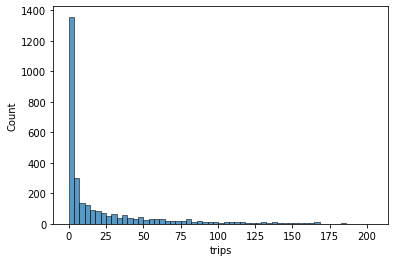

In [46]:
gdf = df.groupby('driver_id')['trips'].count().reset_index()
sns.histplot(gdf, x='trips')

In [47]:
gdf['trips'].describe()

count    2922.000000
mean       20.801848
std        33.336531
min         0.000000
25%         1.000000
50%         5.000000
75%        27.000000
max       204.000000
Name: trips, dtype: float64

In [58]:
juniors = gdf[gdf['trips']<=5]
m_j = df.driver_id.isin(juniors.driver_id)
junior_drivers = df[m_j]
senior_drivers = df[~m_j]

In [61]:
junior_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6971 entries, 106 to 99996
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   starting_date    6971 non-null   object 
 1   area_id          6971 non-null   int64  
 2   interval_id      6971 non-null   int64  
 3   driver_id        6971 non-null   int64  
 4   courses          2056 non-null   float64
 5   trips            2056 non-null   float64
 6   radial_distance  2056 non-null   float64
 7   refused_trip     2112 non-null   float64
 8   salary           6752 non-null   float64
 9   cancelled        6971 non-null   bool   
 10  cancelled_at     1100 non-null   object 
 11  presence         6971 non-null   int64  
 12  guaranteed       6971 non-null   int64  
dtypes: bool(1), float64(5), int64(5), object(2)
memory usage: 714.8+ KB


In [62]:
senior_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93029 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   starting_date    93029 non-null  object 
 1   area_id          93029 non-null  int64  
 2   interval_id      93029 non-null  int64  
 3   driver_id        93029 non-null  int64  
 4   courses          58727 non-null  float64
 5   trips            58727 non-null  float64
 6   radial_distance  58727 non-null  float64
 7   refused_trip     59273 non-null  float64
 8   salary           88863 non-null  float64
 9   cancelled        93029 non-null  bool   
 10  cancelled_at     8709 non-null   object 
 11  presence         93029 non-null  int64  
 12  guaranteed       93029 non-null  int64  
dtypes: bool(1), float64(5), int64(5), object(2)
memory usage: 9.3+ MB


<AxesSubplot:xlabel='area_id', ylabel='Count'>

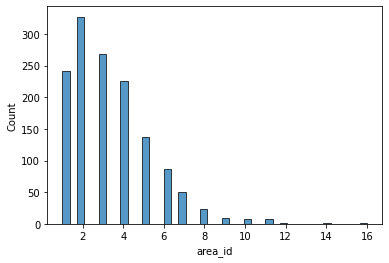

In [76]:
area_per_senior = senior_drivers.groupby(['driver_id'])['area_id'].nunique().reset_index()
sns.histplot(area_per_senior, x= 'area_id', bins='fd', )

<AxesSubplot:xlabel='area_id', ylabel='Count'>

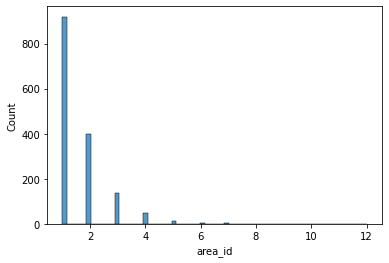

In [77]:
area_per_junior = junior_drivers.groupby(['driver_id'])['area_id'].nunique().reset_index()
sns.histplot(area_per_junior, x= 'area_id', bins='fd')

In [ ]:
area_per_junior = area_per_junior.groupby(['driver_id'])['area_id']

In [16]:
df.drop_duplicates(['starting_date', 'interval_id', 'driver_id'], keep= 'first', inplace = True)

In [81]:
df['cancelled'].value_counts()

False    87800
True     12200
Name: cancelled, dtype: int64

In [79]:
df['presence'] =np.where(df['cancelled']==True, 0 , df['presence'])

In [80]:
df[(df['cancelled']==True) & (df['presence']==1)]

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed


In [98]:
df['starting_date'] = pd.to_datetime(df['starting_date'])
df[['trips', 'courses', 'radial_distance', 'refused_trip', 'salary']] = df[['trips', 'courses', 'radial_distance', 'refused_trip', 'salary']].fillna(0)

In [98]:
df['starting_date'] = pd.to_datetime(df['starting_date'])
df[['trips', 'courses', 'radial_distance', 'refused_trip', 'salary']] = df[['trips', 'courses', 'radial_distance', 'refused_trip', 'salary']].fillna(0)

In [84]:
df['presence'].value_counts()

1    59340
0    40660
Name: presence, dtype: int64

In [12]:
df[df.duplicated(['starting_date', 'driver_id', 'interval_id']) & (df['presence']==1)].groupby('driver_id').count()

,starting_date,area_id,interval_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed
driver_id,,,,,,,,,,,,
7370,10,10,10,10,10,10,10,10,10,0,10,10
7484,1,1,1,1,1,1,1,1,1,1,1,1
7554,1,1,1,1,1,1,1,1,1,0,1,1
7597,1,1,1,1,1,1,1,1,1,0,1,1
7706,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19992,1,1,1,1,1,1,1,1,1,1,1,1
19996,3,3,3,3,3,3,3,3,3,2,3,3
20076,2,2,2,2,2,2,2,2,2,2,2,2


In [14]:
df[df['driver_id']==7370].tail(20)

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed
92228,2021-04-29,12,55,7370,NaN,NaN,NaN,NaN,15000.0,True,NaN,0,1
92229,2021-04-29,12,54,7370,NaN,NaN,NaN,NaN,15000.0,True,NaN,0,1
93198,2021-04-28,12,55,7370,NaN,NaN,NaN,NaN,7500.0,True,NaN,0,1
93199,2021-04-28,12,54,7370,NaN,NaN,NaN,NaN,7500.0,True,NaN,0,1
94175,2021-04-27,12,55,7370,NaN,NaN,NaN,NaN,0.0,False,NaN,0,1
94176,2021-04-27,1,54,7370,NaN,NaN,NaN,0.0,0.0,False,NaN,0,1
95130,2021-04-26,12,55,7370,8.0,6.0,12.009787,0.0,336000.0,False,NaN,1,1
95131,2021-04-26,12,54,7370,8.0,5.0,9.981340,1.0,336000.0,False,NaN,1,1
96113,2021-04-25,12,55,7370,NaN,NaN,NaN,NaN,20000.0,False,NaN,0,1
96114,2021-04-25,27,54,7370,NaN,NaN,NaN,NaN,20000.0,True,NaN,0,1


In [32]:
df['starting_date'].max()

'2021-06-27'

In [33]:
df['starting_date'].min()

'2021-04-20'

In [8]:
df['driver_id'].nunique()

2922

## Preprocessing Data

In [14]:
def extract_feature(data, row):
    courier = row['driver_id']
    date = row['starting_date']
    past_days = 10
    
    couriers_history = data[(data['driver_id']==courier) & ((date - data['starting_date']).dt.days < past_days)]
    #interval_history = couriers_history[couriers_history['interval_id']==shift]
    
    #total_reservation = couriers_history.shape[0]
    cancelled_reservation = couriers_history[(couriers_history['cancelled'] == True)].shape[0]
    notcancelled_notpresent_reservation = couriers_history[(couriers_history['cancelled']== False)
                                                           & (couriers_history['presence']==0)].shape[0]
    present_reservation = couriers_history[couriers_history['presence']==1].shape[0]
    #courses_shift_ratio =  couriers_history['courses'].sum()
    trips = couriers_history['trips'].sum()
    #distance_shift_ratio = couriers_history['radial_distance'].sum()
    refused_ratio= couriers_history['refused_trip'].sum() / trips
    salary = couriers_history['salary'].mean()
    
    return [cancelled_reservation, notcancelled_notpresent_reservation, present_reservation,trips, refused, salary]

In [46]:
def pre_process (df):
    
    ## Dropping couriers with less than 5 present shifts
    gdf= df.groupby(['driver_id'])['presence'].sum().reset_index().rename({'presence':'total_present_shift'}, axis=1)
    gdf = gdf[gdf['total_present_shift']>=5]
    m = df.driver_id.isin(gdf.driver_id)
    df = df[m]
    
    ## Feature Extraction
    df['dayofweek'] = df['starting_date'].dt.dayofweek
    df['day'] = df['starting_date'].dt.day 
    df['cancelled_reservation'], df['not_present_reservation'], df['present_reservation'],df['trips'], df['refused'], df['salary']\
    = df.apply(lambda row : extract_feature(df, row), axis=1,result_type='expand').T.values
    
    return df

In [16]:
data = pre_process(df)

In [21]:
data.head()

,starting_date,area_id,interval_id,driver_id,courses,trips,radial_distance,refused_trip,salary,cancelled,cancelled_at,presence,guaranteed,dayofweek,day,cancelled_reservation,not_present_reservation,present_reservation,refused
0,2021-06-27,117,63,19355,0.0,1.057143,0.0,0.0,112383.885714,False,NaN,0,0,6,27,3.0,18.0,14.0,0.428571
1,2021-06-27,11,61,11881,0.0,0.200000,0.0,0.0,18000.000000,False,NaN,0,0,6,27,0.0,9.0,1.0,0.100000
2,2021-06-27,34,63,16582,0.0,0.285714,0.0,0.0,42534.761905,False,NaN,0,0,6,27,2.0,15.0,4.0,0.095238
3,2021-06-27,117,62,19355,0.0,1.057143,0.0,0.0,112383.885714,False,NaN,0,0,6,27,3.0,18.0,14.0,0.428571
4,2021-06-27,17,62,12073,0.0,1.575758,0.0,0.0,119224.848485,False,NaN,0,0,6,27,1.0,20.0,12.0,0.000000


In [22]:
data_test = data[(data['starting_date']>=pd.to_datetime('20210612' , format='%Y%m%d'))
              & (data['starting_date']<=pd.to_datetime('20210618', format='%Y%m%d'))].reset_index()

data_train = data[(data['starting_date']>=pd.to_datetime('20210501' , format='%Y%m%d'))
               & (data['starting_date']<=pd.to_datetime('20210611' , format='%Y%m%d'))].reset_index()

In [23]:
X_columns = ['guaranteed', 'cancelled_reservation', 'not_present_reservation',
             'present_reservation', 'dayofweek', 'day','trips', 'refused', 'salary']
X_train = data_train.filter(X_columns)
y_train = data_train[['presence']]
X_test = data_test.filter(X_columns)
y_test = data_test[['presence']]
train = X_train.join(y_train)
test = X_test.join(y_test)

In [24]:
data_train['driver_id'].nunique()

1760

## Getting to Know Train Data

In [ ]:
data_train.head(3)

In [ ]:
data_train.info()

In [ ]:
print( "Number of drivers in dataset is" , data_train['driver_id'].nunique())

In [ ]:
print( "dataset starts in",  data_train['starting_date'].min() , "and end in" , data_train['starting_date'].max())

In [ ]:
data_train['cancelled'].value_counts()

In [25]:
gdf= data_train.groupby(['driver_id'])['trips'].sum().reset_index().rename({'trips':'total_trips'}, axis=1)
gdf['total_trips'].describe()

count    1760.000000
mean       81.050034
std        90.150856
min         0.000000
25%        12.674442
50%        47.242882
75%       119.963055
max       614.312659
Name: total_trips, dtype: float64

<AxesSubplot:xlabel='total_trips', ylabel='Count'>

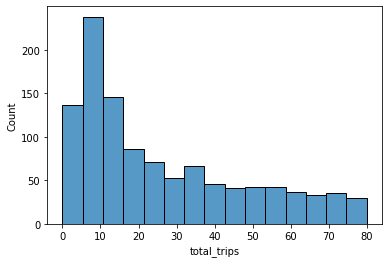

In [26]:
sns.histplot(gdf, x='total_trips', stat= 'count', bins= 'doane', binrange=[0, 80])

<AxesSubplot:xlabel='courses', ylabel='Count'>

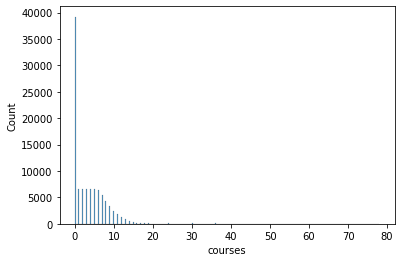

In [36]:
sns.histplot(df, x='courses', stat= 'count')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

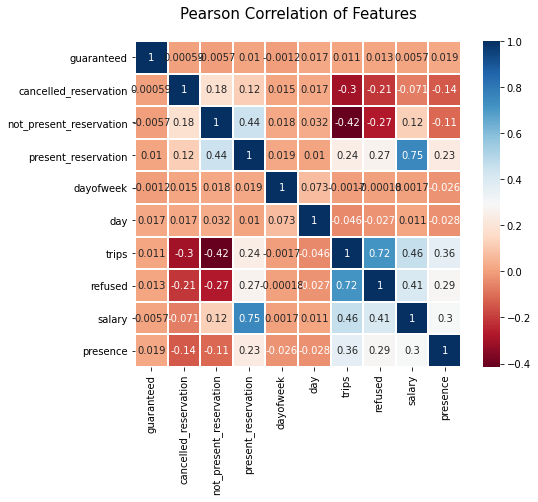

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
X_train

,guaranteed,cancelled_reservation,not_present_reservation,present_reservation,dayofweek,day,trips,refused,salary
0,1,12.0,57.0,34.0,4,11,1.087379,0.116505,141338.019417
1,1,6.0,26.0,57.0,4,11,1.954545,0.318182,233549.818182
2,1,6.0,26.0,57.0,4,11,1.954545,0.318182,233549.818182
3,1,46.0,5.0,29.0,4,11,1.065789,0.197368,141015.157895
4,1,1.0,53.0,11.0,4,11,0.307692,0.000000,64724.000000
...,...,...,...,...,...,...,...,...,...
65120,1,7.0,53.0,131.0,5,1,2.064171,0.352941,299386.689840
65121,1,27.0,39.0,74.0,5,1,2.217391,0.536232,160858.985507
65122,1,0.0,32.0,29.0,5,1,1.622951,0.229508,89711.573770
65123,1,5.0,11.0,39.0,5,1,3.320755,0.603774,218230.716981


## Model Selection

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

scoring = ['accuracy', 'precision', 'recall' , 'f1_weighted', 'roc_auc']

#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

LR = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
scores = cross_validate(LR, X_train, np.ravel(y_train), scoring=scoring, cv=5)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision'].mean()
LR_recall = scores['test_recall'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
scores = cross_validate(random_forest, X_train, np.ravel(y_train), scoring=scoring, cv=5)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision'].mean()
forest_recall = scores['test_recall'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### Support Vector Machine

In [33]:
from sklearn.svm import SVC

SVM = make_pipeline(StandardScaler(), SVC())
scores = cross_validate(SVM, X_train, np.ravel(y_train), scoring=scoring, cv=5)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision'].mean()
SVM_recall = scores['test_recall'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

### K Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores = cross_validate(KNN, X_train, np.ravel(y_train), scoring=scoring, cv=5)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision'].mean()
KNN_recall = scores['test_recall'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [35]:
models_initial = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors'],
    'Fitting time': [LR_fit_time, SVM_fit_time, forest_fit_time, KNN_fit_time],
    'Scoring time': [LR_score_time, SVM_score_time, forest_score_time, KNN_score_time],
    'Accuracy'    : [LR_accuracy, SVM_accuracy, forest_accuracy, KNN_accuracy],
    'Precision'   : [LR_precision, SVM_precision, forest_precision, KNN_precision],
    'Recall'      : [LR_recall, SVM_recall, forest_recall, KNN_recall],
    'F1_score'    : [LR_f1, SVM_f1, forest_f1, KNN_f1],
    'AUC_ROC'     : [LR_roc, SVM_roc, forest_roc, KNN_roc]
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Logistic Regression,0.052764,0.017707,0.712507,0.735161,0.865696,0.696126,0.744526
1,Support Vector Machine,101.672415,34.503103,0.710802,0.719871,0.902279,0.683502,0.690162
2,Random Forest,7.137813,0.410888,0.671155,0.733614,0.779215,0.658127,0.688437
3,K-Nearest Neighbors,2.163259,2.481945,0.650211,0.708813,0.775063,0.641162,0.641683


In [1]:
10000/110

90.9090909090909

### Testing Models on Recent Data

In [48]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, np.ravel(y_train))
pred =random_forest.predict(X_test)
acc = random_forest.score(X_test, y_test)
print("Accuracy achived with random forest on last week data is %.2f" %(acc*100))

Accuracy achived with random forest on last week data is 71.42


In [49]:
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm, columns=['Negetive', 'Positive'], index=['Negetive', 'Positive'])
cm

,Negetive,Positive
Negetive,2496,2521
Positive,1434,7386


In [50]:
test['presence'].value_counts()

1    8820
0    5017
Name: presence, dtype: int64

### Hyperparameter Tuning

In [43]:
def randomized_search(X_data, y_data, model, random_grid):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    random_search = RandomizedSearchCV(model, random_grid, n_iter=10, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
    search_result = random_search.fit(X_data, np.ravel(y_data))

    print("Best: %f using %s" % (search_result.best_score_, search_result.best_params_))
    
    means = search_result.cv_results_['mean_test_score']
    fit_times = search_result.cv_results_['std_test_score']
    params = search_result.cv_results_['params']
    for mean, time, param in zip(means, fit_times, params):
        print("%f (%f) with: %r" % (mean, time, param))

In [44]:
def grid_search (X_data, y_data, model, grid):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(model, grid, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
    grid_result = grid_search.fit(X_data, np.ravel(y_data))

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    means = grid_result.cv_results_['mean_test_score']
    fit_times = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, time, param in zip(means, fit_times, params):
        print("%f (%f) with: %r" % (mean, time, param))

In [45]:
model = RandomForestClassifier()
n_estimators = range(50, 500, 50)
max_depth = [3, 4, 5]
min_samples_split = [0.05, 0.02, 0.01, 0.005]
min_samples_leaf = [0.01, 0.001, 0.025, ]
max_features = ['log2', 'sqrt']
grid = dict(n_estimators= n_estimators, max_depth = max_depth, min_samples_leaf= min_samples_leaf,
            max_features=max_features, min_samples_split=min_samples_split)
randomized_search(X_train, y_train, model, grid)

Best: 0.713745 using {'n_estimators': 300, 'min_samples_split': 0.005, 'min_samples_leaf': 0.01, 'max_features': 'log2', 'max_depth': 5}
0.713203 (0.003601) with: {'n_estimators': 450, 'min_samples_split': 0.05, 'min_samples_leaf': 0.01, 'max_features': 'log2', 'max_depth': 5}
0.712420 (0.003437) with: {'n_estimators': 450, 'min_samples_split': 0.01, 'min_samples_leaf': 0.01, 'max_features': 'log2', 'max_depth': 4}
0.713495 (0.003733) with: {'n_estimators': 350, 'min_samples_split': 0.005, 'min_samples_leaf': 0.01, 'max_features': 'log2', 'max_depth': 5}
0.712353 (0.003533) with: {'n_estimators': 300, 'min_samples_split': 0.01, 'min_samples_leaf': 0.01, 'max_features': 'sqrt', 'max_depth': 4}
0.713228 (0.003853) with: {'n_estimators': 350, 'min_samples_split': 0.05, 'min_samples_leaf': 0.001, 'max_features': 'log2', 'max_depth': 5}
0.713745 (0.003713) with: {'n_estimators': 300, 'min_samples_split': 0.005, 'min_samples_leaf': 0.01, 'max_features': 'log2', 'max_depth': 5}
0.710521 (0.00

In [ ]:
model = SVC(random_state=41)
C = [25, 50, 75]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2 , 3 , 4]
gamma = ['scale', 'auto']
coef0 = np.linspace(1, 200, 20)
shrinking = [True, False]
class_weight = [{0:1, 1:3}, 'balanced']
grid = dict(kernel=kernel,C=C,gamma=gamma, coef0=coef0, shrinking=shrinking, class_weight=class_weight)
randomized_search(X_validation, y_validation, model, grid)

## Checking Errors

In [ ]:
last_week['pred'] = pred

In [ ]:
errors = last_week[last_week['presence']!=last_week['pred']]
errors.head()

In [ ]:
def plot_dist(data, feature):

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=data[feature], name='total'))
    fig.add_trace(go.Histogram(x=data[data['presence']!=data['pred']][feature], name='wrong prediction'))
    

    fig.update_layout(
        title_text='Wrong Predictions per '+ feature, # title of plot
        xaxis_title_text= feature, # xaxis label
        yaxis_title_text='Count', # yaxis label
        barmode= 'overlay',
        bargap= 0.2, # gap between bars of adjacent location coordinates
        bargroupgap= 0.1 # gap between bars of the same location coordinates
    )
    fig.show()

In [ ]:
plot_dist(last_week, 'interval_id')

In [ ]:
plot_dist(last_week, 'total_reservation')

best accuracy with (C=50, kernel='rbf',gamma='scale')